In [6]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D

mat_file = scipy.io.loadmat("data/PTSDvsHC.mat")

dataset = mat_file['dataset'] # 90개의 데이터, 62개의 전극, 1001의 타임스텝
y = mat_file['Y']

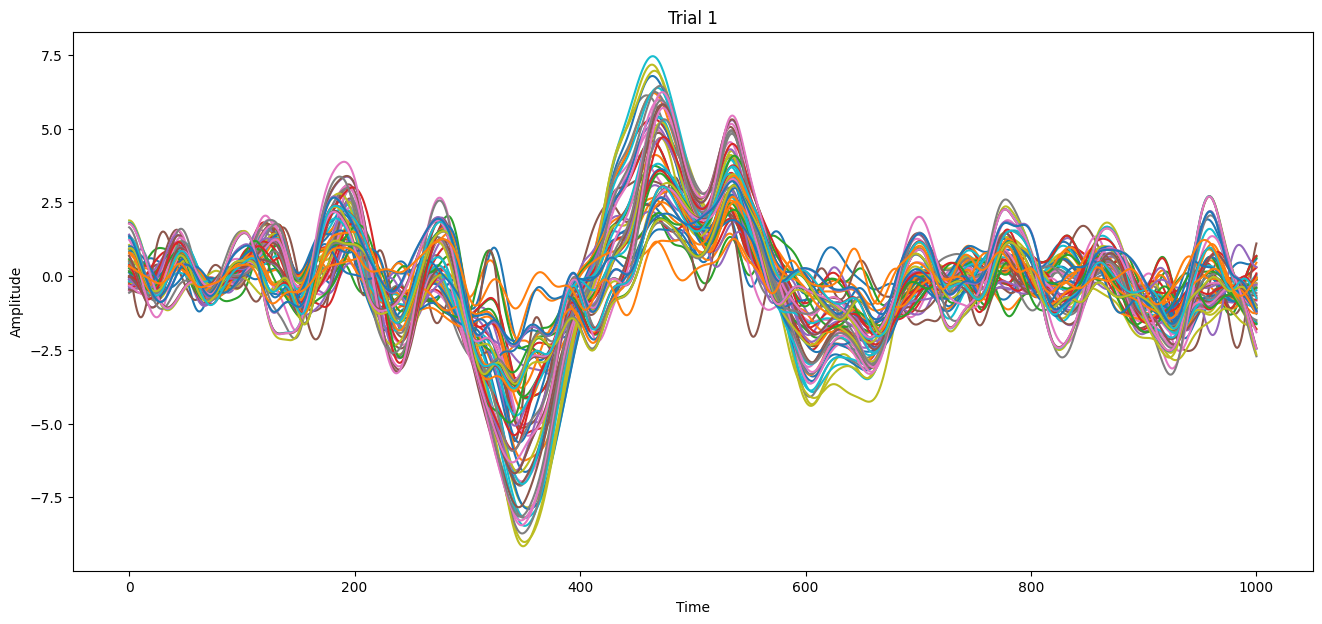

In [20]:
plt.figure(figsize=(16, 7))

trial = 0

for channel in range(62):  # 62개의 채널
    data = dataset[trial, channel, :]
    plt.plot(data, label=f'Channel {channel + 1}')

plt.title(f'Trial {trial + 1}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


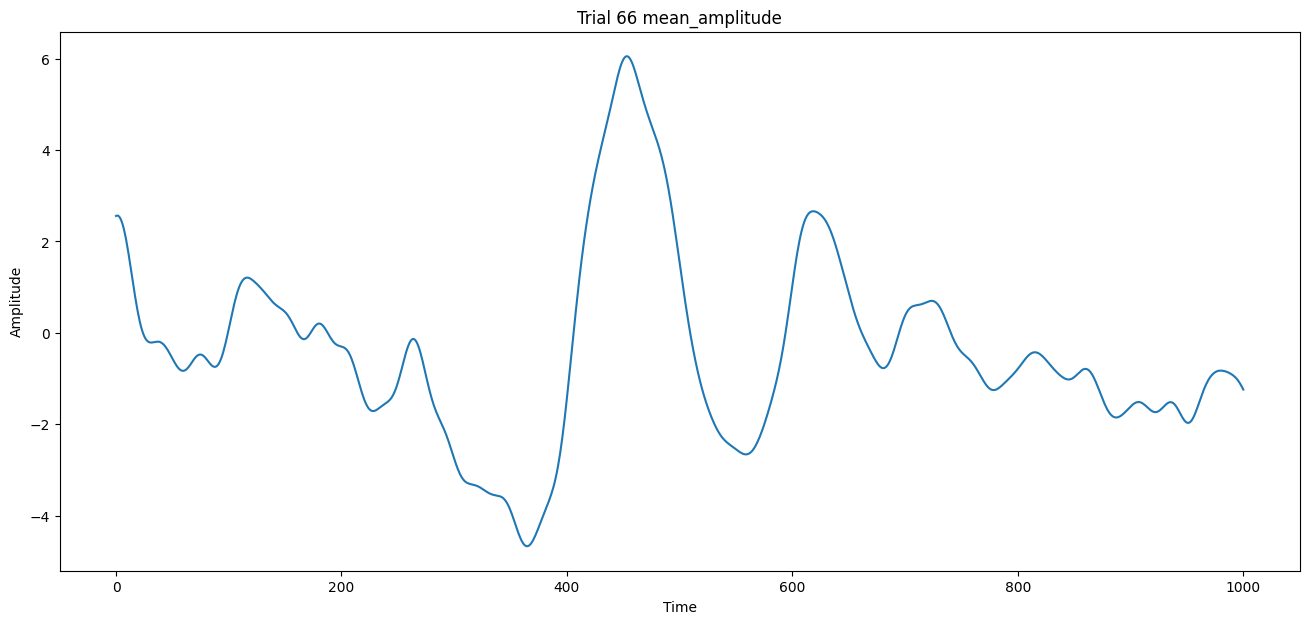

In [38]:
import numpy as np

plt.figure(figsize=(16, 7))
trial = 65

mean_amplitude = np.mean(dataset[trial, :, :], axis=0)

plt.plot(mean_A)

plt.title(f'Trial {trial + 1} mean_amplitude')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [37]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

mat_file = scipy.io.loadmat("data/PTSDvsHC.mat")

dataset = mat_file['dataset'] 
# 90개의 데이터, 62개의 전극 채널, 1001의 타임스텝 - 1001씩 이미 에포킹을 한 상태이며, 그에따른 평균을 낸 것임(에포킹에 대해)

X = dataset
y = mat_file['Y']
y = to_categorical(y, num_classes = 2)

X = np.swapaxes(X, 1, 2)

subject_test_acc = []

input_shape = (1001, 62)

for i in range(len(dataset)): # loso
    X_train = np.concatenate([X[:i], X[i+1:]], axis=0)
    X_test = X[i:i+1]
    y_train = np.concatenate([y[:i], y[i+1:]], axis=0)
    y_test = y[i:i+1]
    
    model_input = layers.Input(shape = input_shape)
    output1 = layers.Conv1D(filters=32, kernel_size = 5)(model_input)
    output2 = layers.Conv1D(filters=32, kernel_size = 5, activation='relu')(output1)
    output3 = layers.MaxPool1D(pool_size = 2)(output2)
    output_end = layers.GlobalMaxPool1D()(output3)
    prediction = layers.Dense(2, activation = 'softmax')(output_end)
    model = keras.Model(inputs = model_input, outputs = prediction)
    # model.summary()
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=1, verbose=0)
    predictions = model.predict(X_test)
    
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(predicted_classes, actual_classes)
    print(f"fold {i} accuracy : {acc}")

    subject_test_acc.append(acc)
    model.save(f"erp_model_0121.h5")
print(f"loso mean accuracy : {np.mean(subject_test_acc)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
fold 0 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
fold 1 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
fold 2 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
fold 3 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
fold 4 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
fold 5 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
fold 6 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
fold 7 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
fold 8 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
fold 9 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
fold 10 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
fold 11 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fold 12 accuracy : 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
fold 13 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
fold 14 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
fold 15 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/s

In [54]:
print(X.shape)
print(X.dtype)

(90, 1001, 62)
float64


In [41]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import absl.logging

absl.logging.set_verbosity(absl.logging.ERROR) # .h5 에러메세지 무시

mat_file = scipy.io.loadmat("data/PTSDvsHC.mat")

dataset = mat_file['dataset'] 
# 90개의 데이터, 62개의 전극 채널, 1001의 타임스텝 - 1001씩 이미 에포킹을 한 상태이며, 그에따른 평균을 낸 것임(에포킹에 대해)

X = dataset
y = mat_file['Y']
y = to_categorical(y, num_classes = 2)

X = np.swapaxes(X, 1, 2)

subject_test_acc = []

input_shape = (1001, 62)

for i in range(len(dataset)): # loso
    X_train = np.concatenate([X[:i], X[i+1:]], axis=0)
    X_test = X[i:i+1]
    y_train = np.concatenate([y[:i], y[i+1:]], axis=0)
    y_test = y[i:i+1]

    x = layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(mish)(x)
    model_input = layers.Input(shape = input_shape)
    
    output1 = layers.Conv1D(filters=16, kernel_size = 7)(model_input)
    output1 = layers.BatchNormalization()(output1)
    
    output2 = layers.MaxPool1D(pool_size=3)(output1)
    
    output3 = layers.Conv1D(filters=32, kernel_size = 5, activation='elu')(output2)
    
    output_end = layers.GlobalMaxPool1D()(output3)
    
    prediction = layers.Dense(2, activation = 'softmax')(output_end)
    model = keras.Model(inputs = model_input, outputs = prediction)
    # model.summary()
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=1, verbose=0)
    predictions = model.predict(X_test)
    
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(predicted_classes, actual_classes)
    print(f"fold {i} accuracy : {acc}")

    subject_test_acc.append(acc)
    model.save(f"erp_model_0121.h5")
print(f"loso mean accuracy : {np.mean(subject_test_acc)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
fold 0 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
fold 1 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
fold 2 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
fold 3 accuracy : 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
fold 4 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
fold 5 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
fold 6 accuracy : 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
fold 7 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fold 8 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
fold 9 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fold 10 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fold 11 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
fold 12 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fold 13 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
fold 14 accuracy : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
fold 15 accuracy : 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms